В этой практической работе три обязательные задачи и одна дополнительная.

*Обязательные задачи* нужно сделать для того, чтобы проверить, что вы действительно усвоили материал модуля. Сдайте их на проверку.

*Дополнительная задача* для тех, кто чувствует, что нужно ещё немного потренироваться в подборе правильных критериев для проверки гипотез. Вы также можете сдать её на проверку и получить обратную связь.

Удачи!

## Цели практической работы

Проверить:
*   постановку нулевых и альтернативных гипотез,
*   выбор статистического критерия для проверки гипотез,
*   умение пользоваться Т-критериями,
*   умение пользоваться непараметрическими критериями.

Потренироваться в постановке односторонних и двусторонних тестов.

## Что оценивается

*   Все условия для применения критерия проверены.
*   Применение того или иного критерия обосновано текстом.
*   В каждой задаче присутствует текстовое объяснение почему нулевая гипотеза не может быть отвергнута.




## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему куратору.


##Обязательные задачи

*Задача 1*

Студентов с одним и тем же начальным уровнем английского языка поделили на две группы. Одну группу учили по методике X, а другую по методике Y. После прохождения обучения им дали одинаковые финальные тесты на знание языка. За тест можно получить от 0 до 100 баллов. Проверьте, являются ли статистически значимыми различия в оценках между группой, которая училась по методике X, и группой, которая училась по методике Y.
______________
Опишите словами нулевую и альтернативную гипотезы. Проверьте гипотезы с помощью статистического критерия. Интерпретируйте получившиеся результаты. Уровень значимости = 5%.

#### Нулевая гипотеза: Оценки групп не отличиются.

#### Альтернативная гипотеза: Оценки групп различны.

# строка для тех, кто работает в colab
!pip install scipy==1.7.1

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats

df = pd.read_csv('data\hw1.csv')
df.head()

,X,Y
0,57,64
1,67,67
2,58,62
3,55,59
4,54,65


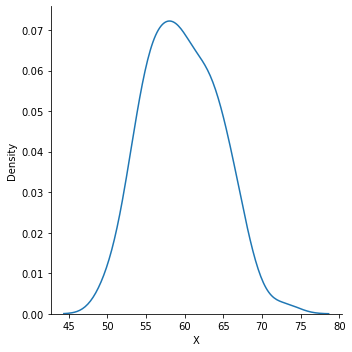

In [11]:
# Посмотрим распределение оценок по группе X
sns.displot(df, x='X', kind='kde');

Форма графика распределения близка к колокообразной форме, выбросов нет, явной асимметрии гистограммы нет - данные распределены нормально.

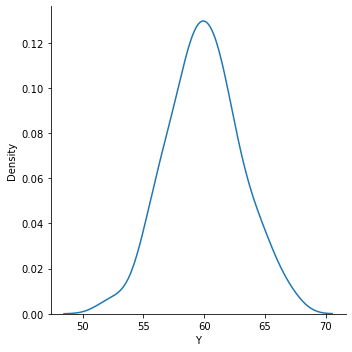

In [14]:
# Посмотрим распределение оценок по группе Y
sns.displot(df, x='Y', kind='kde');

Форма графика распределения близка к колокообразной форме, выбросов нет, явной асимметрии гистограммы нет - данные распределены нормально.

In [13]:
#Проверим с помощью метода Шапиро
print("Проверим нормальность распределения X. p-Value =",stats.shapiro(df.X)[1],'\n',"Проверим нормальность распределения Y. p-Value =",stats.shapiro(df.Y)[1])

Проверим нормальность распределения X. p-Value = 0.28597292304039 
 Проверим нормальность распределения Y. p-Value = 0.4001672565937042


Оценки в группе X и в группе Y, имеют нормальное распределение

In [50]:
#Проверим равенство дисперсий. Используем тест Ливена
if stats.levene(df.X, df.Y)[1] > .05:
    s = "Выборки имеют равные дисперсии"
else:
    s = "Выборки имеют не равные дисперсии"
print (s, "p_value =", stats.levene(df.X, df.Y)[1])

Выборки имеют не равные дисперсии p_value = 5.850812069599258e-06


Выборки имеют различные дисперсии.

Применим модифицикацию критерия Стьюдента Т-Критерий Уэлча для выборок с неравными дисперсиями

In [51]:
if stats.ttest_ind(df.X, df.Y, equal_var = False)[1]>.05:
    s = "Уровень значимости больше принятого значения 0,05. Нулевая гипотеза принята."
else:
    s = "Уровень значимости меньше принятого значения 0,05. Нулевая гипотеза отвергнута."
print(s, "p-value =", stats.ttest_ind(df.X, df.Y, equal_var = False)[1])

Уровень значимости больше принятого значения 0,05. Нулевая гипотеза принята. p-value = 0.5300187896437802


Различий в оценках между группой, которая училась по методике X, и группой, которая училась по методике Y - нет

*Задача 2*

Ученые придумали добавку для уменьшения веса за две недели. Для проведения эксперимента и проверки добавки набрали тестовую группу из 60 человек. Было произведено два замера веса: один до приема добавок, другой после двухнедельного курса. Изучите данные и сделайте вывод, значимо или незначимо уменьшился вес у тестовой группы.

______________
Опишите словами нулевую и альтернативную гипотезы. Проверьте гипотезы с помощью статистического критерия. Интерпретируйте получившиеся результаты. Уровень значимости = 5%.

Нулевая гипотеза: Средний вес не изменится после приема курса добавок

Альтернативная гипотеза: Средний вес уменьшится после приема курса добавок

In [24]:
df2 = pd.read_csv('data/hw2.csv')
df2.head()

,before,after
0,66,68
1,68,68
2,59,60
3,64,62
4,75,71


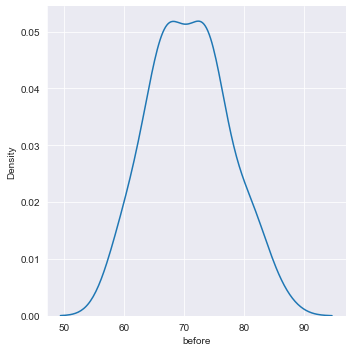

In [25]:
# Посмотрим распределение веса до приема курса добавок
sns.displot(df2, x='before', kind='kde');

Форма графика распределения близка к колокообразной форме, выбросов нет, явной асимметрии гистограммы нет - данные распределены нормально.

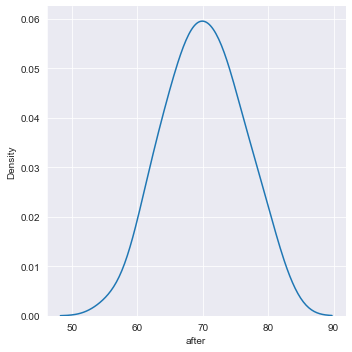

In [26]:
# Посмотрим распределение веса после приема курса добавок
sns.displot(df2, x='after', kind='kde');

Форма графика распределения близка к колокообразной форме, выбросов нет, явной асимметрии гистограммы нет - данные распределены нормально.

In [27]:
#Проверим с помощью метода Шапиро
print("Проверим нормальность распределения X. p-Value =",stats.shapiro(df2.before)[1],'\n',"Проверим нормальность распределения Y. p-Value =",stats.shapiro(df2.after)[1])

Проверим нормальность распределения X. p-Value = 0.5405492782592773 
 Проверим нормальность распределения Y. p-Value = 0.8322210311889648


In [28]:
#Проверим равенство дисперсий. Используем тест Ливена
if stats.levene(df2.before, df2.after)[1] > .05:
    s = "Выборки имеют равные дисперсии"
else:
    s = "Выборки имеют не равные дисперсии"
print (s, "p_value =", stats.levene(df2.before, df2.after)[1])

Выборки имеют равные дисперсии p_value = 0.3489077384470678


Данные имеют нормальное распределение, выборки зависимы

In [29]:
res=stats.ttest_rel(df2.before, df2.after,alternative='less')[1]<.05
if res:
    str_ = "Остаемся в рамках нулевой гипотиезы, вес не изменился после приема курса добавок."
else:
    str_ = "Нулевая гипотиза отвергнута, вес уменьшился после приема курса добавок."
print(str_,"p-value=",stats.ttest_rel(df2.before, df2.after,alternative='less')[1])

Нулевая гипотиза отвергнута, вес уменьшился после приема курса добавок. p-value= 0.9778886499519898


*Задача 3*

Вы работаете аналитиком в приложении, которое собирает новости по интересам пользователя. Например, если пользователь увлечен книгами,  то приложение будет собирать ему самые свежие новости по новым книгам. Вы заметили, что пользователи редко посещают ваше приложение, а вам хотелось бы поднять их активность и видеть, что они заходят в приложение каждый день или еще чаще. То есть поднять их заинтересованность. 

Вы и группа разработки решили присылать уведомления раз в день с самой популярной новостью по тематикам пользователя. Теперь вам нужно проверить, что эта гипотеза сработала, и заинтересованность пользователя выросла.
______________________
В датасете для каждого пользователя указано, сколько раз в неделю он заходил до появления уведомлений (колонка `before`) и сколько раз в неделю он стал заходить в приложение после появления уведомлений (колонка `after`)
______________
Опишите словами нулевую и альтернативную гипотезы. Проверьте гипотезы с помощью статистического критерия. Интерпретируйте получившиеся результаты. Уровень значимости = 5%.

Нулевая гипотеза: Посещаемость приложения не изменилась после рассылки уведомлений

Альтернативная гипотеза: Посещаемость приложения увеличилась после рассылки уведомлений

In [30]:
df3 = pd.read_csv('data/hw3.csv')
df3.head()

,id,before,after
0,15,3,11
1,7,6,13
2,6,3,8
3,13,1,14
4,11,3,4


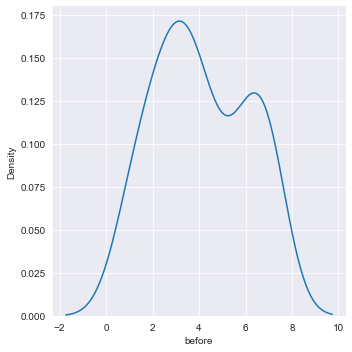

In [31]:
# Посмотрим распределение веса до рассылки уведомлений
sns.displot(df3, x='before', kind='kde');

Форма графика распределения не имеет колокообразной форме, выбросов нет, есть явная асимметрия гистограммы - данные распределены не нормально.

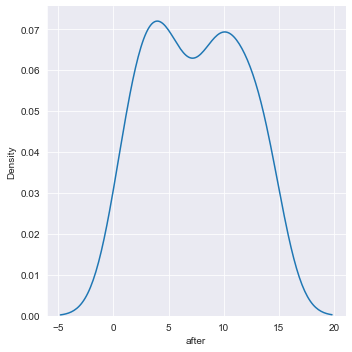

In [32]:
# Посмотрим распределение веса после рассылки уведомлений
sns.displot(df3, x='after', kind='kde',);

Форма графика распределения не имеет колокообразной форме, выбросов нет, есть явная асимметрия гистограммы - данные распределены не нормально.

In [33]:
#Проверим с помощью метода Шапиро
print("Проверим нормальность распределения до (before). p-Value =",stats.shapiro(df3.before)[1],'\n',"Проверим нормальность распределения после (after). p-Value =",stats.shapiro(df3.after)[1])

Проверим нормальность распределения до (before). p-Value = 0.0011287692468613386 
 Проверим нормальность распределения после (after). p-Value = 0.006789296865463257


Данные не имеют нормального распределение, выборки зависимы. Используем тест Вилкоксона

In [35]:
#Проверяем гипотезу
res = stats.wilcoxon(df3.before, df3.after, alternative='greater')[1]<.05
if res:
    str_ = "Остаемся в рамках нулевой гипотезы, заинтересованность пользователя не изменилось."
else:
    str_ = "Нулевая гипотеза отвергнута, заинтересованность пользователя выросла."
print(str_,"p-value=",stats.ttest_rel(df3.before, df3.after,alternative='greater')[1])

Нулевая гипотеза отвергнута, заинтересованность пользователя выросла. p-value= 0.9999980159616962


## Дополнительная задача

*Задача 4*

Компания X тестирует продажу своего продукта через два разных сайта. На оба сайта приходит одинаковое количество пользователей. Причем выборки пользователей не пересекаются, то есть если пользователь увидел сайт 1, он уже не посетит сайт 2. Проверьте гипотезу, что средний чек по пользователям на сайте 1 отличается от среднего чека пользователей на сайте 2 (период сравнения — один месяц).

Опишите словами нулевую и альтернативную гипотезы. Проверьте гипотезы с помощью статистического критерия. Интерпретируйте получившиеся результаты. Уровень значимости = 5%.

Нулевая гипотеза: Средний чек по пользователю на сайте 1 не отличается от среднего чека по пользователю сайта 2

Альтернативная гипотеза: Средний чек по пользователю на сайте 1 отличается от среднего чека по пользователю сайта 2

In [12]:
df4 = pd.read_csv('data\hw4.csv')
df4.head()

,site1,site2
0,193,720
1,8426,2099
2,4024,2282
3,1447,2455
4,2274,7988


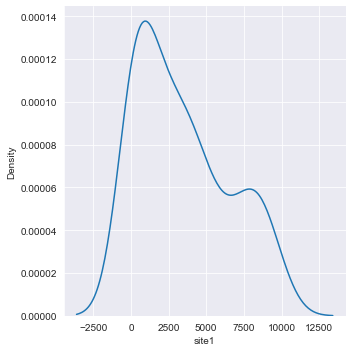

In [13]:
# Посмотрим распределение выборки по сайту 1
sns.displot(df4, x='site1', kind='kde');

Форма графика распределения не имеет колокообразной форме, выбросов нет, есть явная асимметрия гистограммы - данные распределены не нормально.

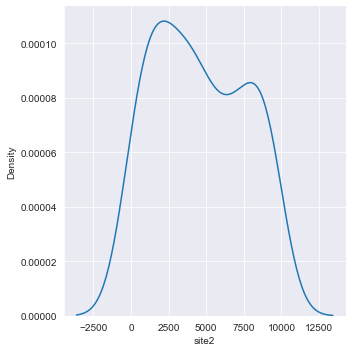

In [14]:
# Посмотрим распределение выборки по сайту 2
sns.displot(df4, x='site2', kind='kde');

Форма графика распределения не имеет колокообразной форме, выбросов нет, есть явная асимметрия гистограммы - данные распределены не нормально.

In [21]:
#Проверим с помощью метода Шапиро
print("Проверим нормальность распределения выборки по сайту 1. p-Value =",stats.shapiro(df4.site1)[1],'\n',"Проверим нормальность распределения выборки по сайту 2. p-Value =",stats.shapiro(df4.site2)[1])

Проверим нормальность распределения выборки по сайту 1. p-Value = 1.3402153626884683e-06 
 Проверим нормальность распределения выборки по сайту 2. p-Value = 0.00013190472964197397


Значения p-value < 5%, остаемся в рамках нулевой гипотезы, данные не имеют нормального распределения

In [22]:
#Проверим равенство дисперсий. Используем тест Ливена
if stats.levene(df4.site1, df4.site2)[1] > .05:
    s = "Выборки имеют равные дисперсии"
else:
    s = "Выборки имеют не равные дисперсии"
print (s, "p_value =", stats.levene(df4.site1, df4.site2)[1])

Выборки имеют равные дисперсии p_value = 0.7405056546728379


In [20]:
## Данные не имеют нормального распределение, выборки не зависимы. Используем тест Мана Уитни
res = stats.mannwhitneyu(df4.site1, df4.site2)[1]<.05
if res:
    str_ = "Остаемся в рамках нулевой гипотезы, средний чек с сайта 1 не отличается от среднего чека с сайта 2."
else:
    str_ = "Нулевая гипотеза отвергнута, средний чек с сайта 1 отличается от среднего чека с сайта 2."
print(str_,"p-value=",stats.ttest_rel(df4.site1, df4.site2)[1])

Остаемся в рамках нулевой гипотезы, средний чек с сайта 1 не отличается от среднего чека с сайта 2. p-value= 0.014223964702701403
